In [91]:
from astropy import units as u
from poliastro.bodies import Earth, Sun
from poliastro.twobody import Orbit
from poliastro.plotting import OrbitPlotter3D
import plotly.io as pio
import numpy as np


N_constellation = 10
sats = list()


a = 6928 * u.km
ecc = 0 * u.one
inc = 97.59 * u.deg
raan = 270 * u.deg
argp = 0 * u.deg
nu = -180 * u.deg


In [92]:
sats = list()
for i in range(N_constellation):
    sats.append(Orbit.from_classical(Earth, a, ecc, inc, raan, argp, nu +360 *i/N_constellation * u.deg))


In [93]:
frame = OrbitPlotter3D()
for sat in sats:
    frame.plot(sat)

frame.show()

In [94]:
for i in range(len(sats)):
    sats[i] = sats[i].propagate(60*60 * u.s)

In [95]:
frame = OrbitPlotter3D()
for sat in sats:
    frame.plot(sat)

frame.show()

In [96]:
import poliastro
from poliastro.core.events import line_of_sight
from poliastro.core.spheroid_location import cartesian_cords

In [97]:
r_gs = cartesian_cords(6000, 6000, 10, 45, 0.1)

In [98]:
sat0 = Orbit.from_classical(Earth, a, ecc, inc, raan, argp, 0 * u.deg)
frame = OrbitPlotter3D()
frame.plot(sat0)
frame.show()

In [99]:
# from astropy.coordinates import SkyCoord
# SkyCoord(sat0.r)
sat0.r

<Quantity [-1.27265295e-12, -6.92800000e+03,  0.00000000e+00] km>

In [100]:
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord

In [101]:
gs = coord.EarthLocation.from_geodetic(lon=10.2*u.degree, lat=45.5*u.degree)  # dec = latitude;   ra = longitude
# gs = coord.EarthLocation.from_geodetic(lon=-80* u.degree, lat=10*u.degree)  # dec = latitude;   ra = longitude
gs_sc = SkyCoord(ra=gs.lon, dec=gs.lat, distance=6371*u.km)

In [102]:
sat0x, sat0y, sat0z = sat0.r
sat0_sc = SkyCoord(x=sat0x, y=sat0y, z=sat0z, representation_type='cartesian')
sat0_sc.representation_type = 'spherical'
sat0_sc.ra.wrap_angle = 180 * u.degree
sat0_sc.dec.wrap_angle = 90 * u.degree


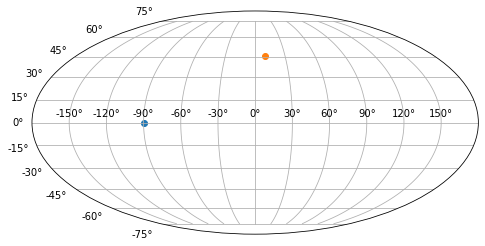

In [103]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(sat0_sc.ra.radian, sat0_sc.dec.radian)
ax.scatter(gs.lon.radian, gs.lat.radian)
# ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)



In [104]:
# sat0_sc.separation(gs_sc)
gs_sc.separation(sat0_sc)


<Angle 97.12995909 deg>

In [105]:
gs_sc.separation_3d(sat0_sc)

<Distance 9977.16107872 km>